# Take Home Notebook For NDTC

```
1. Main entities to track: 
    a. Campaigns
        i. Candidates
            1. Fields are: First name, Last name, District, Office
        ii. Volunteers
            1. Fields are: Belong to a candidate/campaign, Name, Role
    b. Events
        i. Event
            1. Fields are: What people staffed this event?, Money raised, Date, Start time, End time
        ii. Attendance/Leads
        1. Field are: Name, Contact info, Interested in volunteering?, Donation amount
Campaigns
candidates
fields are:
    first name
    Last name
    District
    Office

Volunteers

should belongs to a candidate/campaign Important fields are:

    Name
    role

Events

some things this entity should track

    name
    What people staffed this event?
    how much Money raised at this event
    Date
    Start time
    End time

Attendances / leads

    name
    Contact info
    Interested in volunteering?
    if so what kind of role?
    Donation amount?

```

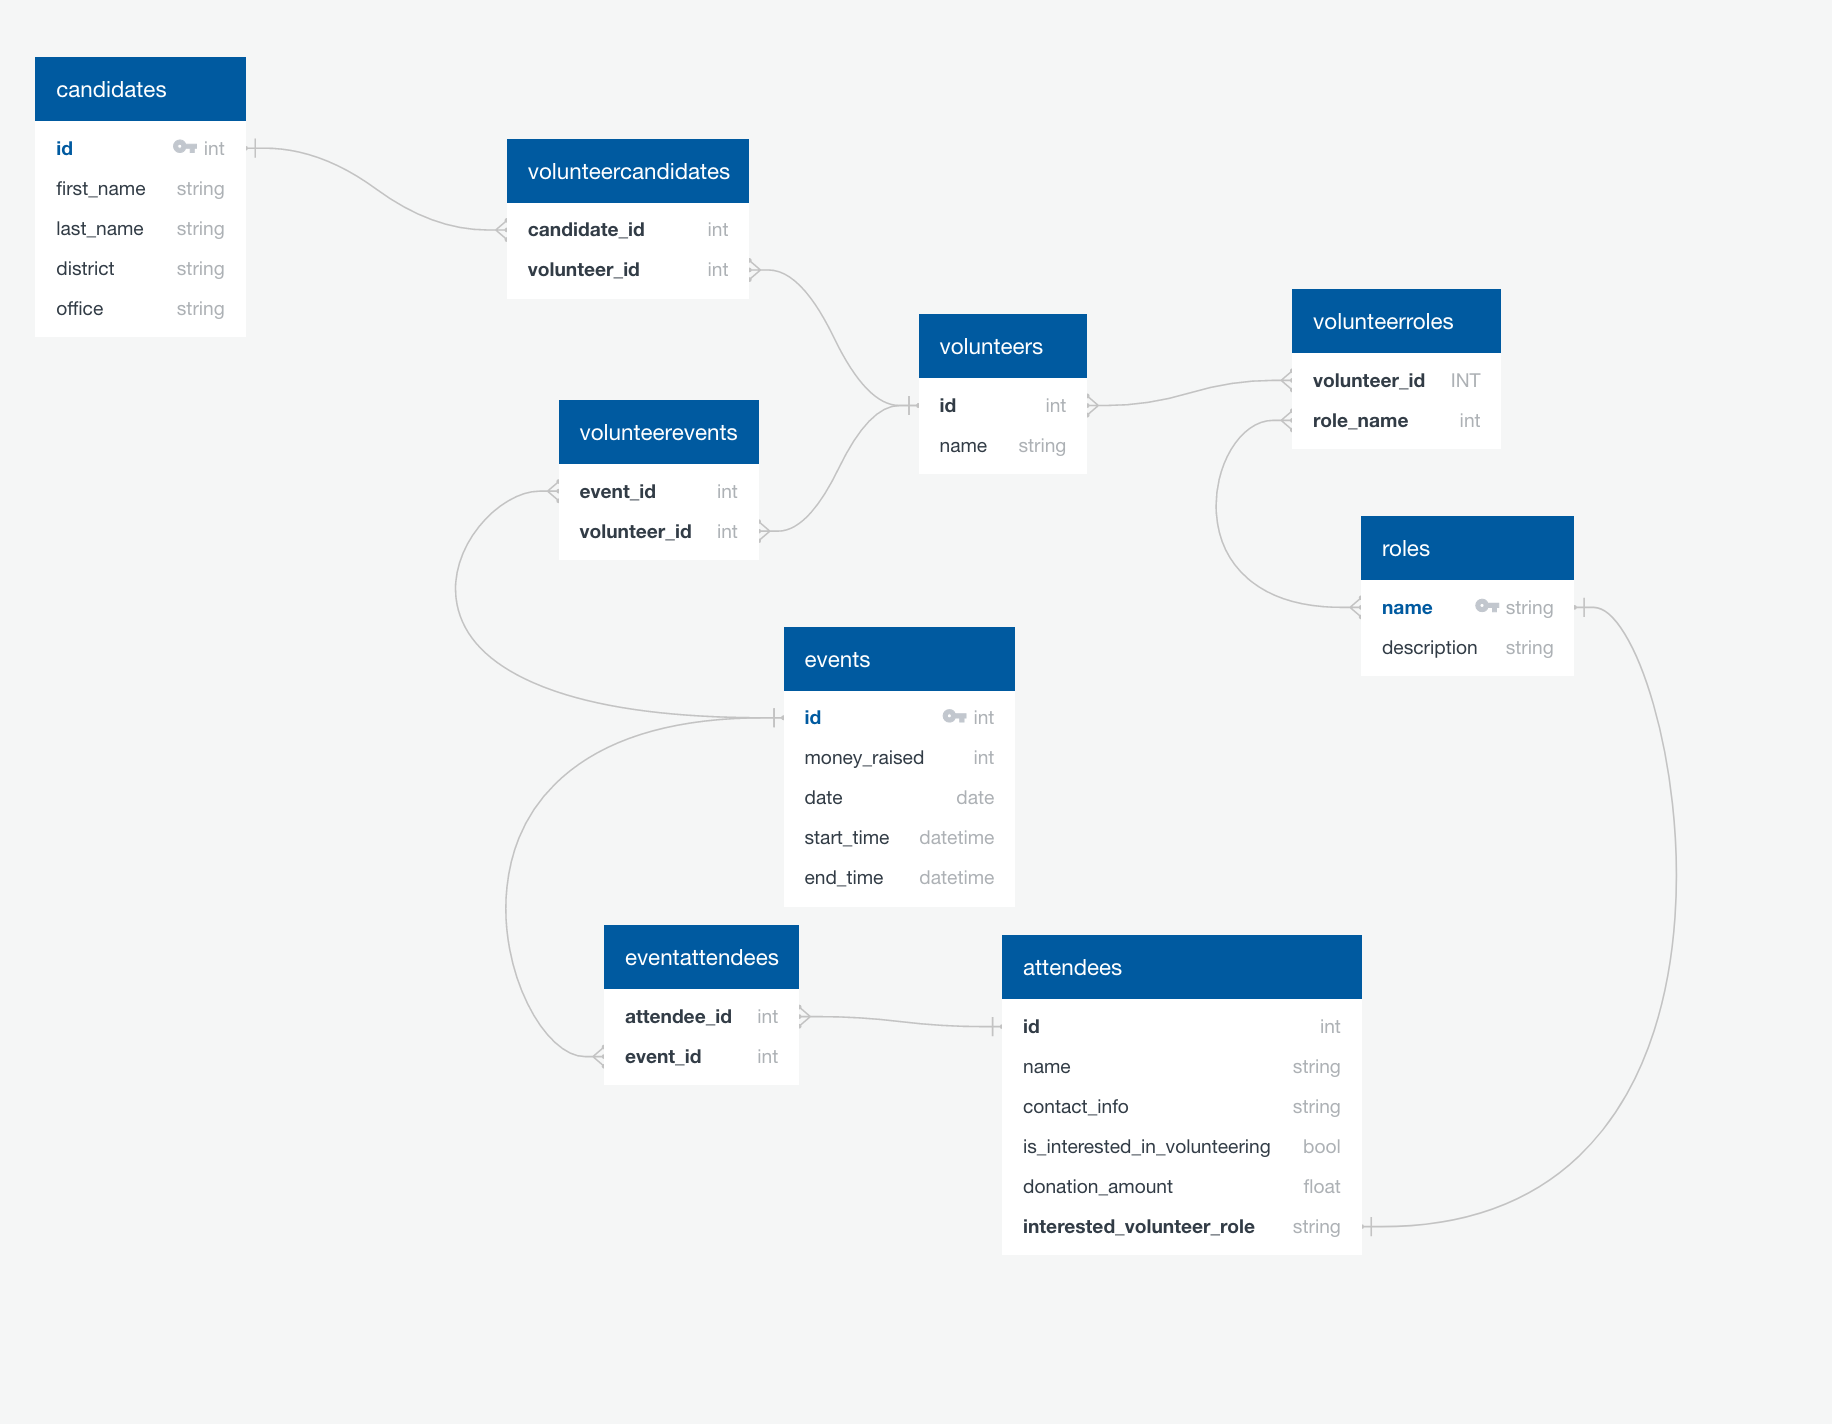

```
2. The service should be able to:
    a. Add / update / read candidates / volunteers
    b. Add / update / read events and attendances
    c. Filter and order results based on fields
    d. Order candidates based on money raised, attendance, donations of events
```

In [ ]:
!curl -X POST  \
-H "Content-Type: application/json"  \
-d '{ "firstName": "John", "lastName": "Doe", "district": "District1", "office": "Office1" }'  \
http://localhost:3000/candidate

In [ ]:
!curl -X POST  \
-H "Content-Type: application/json"  \
-d '{ "firstName": "Jane", "lastName": "Doe", "district": "District2", "office": "Office2" }'  \
http://localhost:3000/candidate

In [ ]:
!curl http://localhost:3000/candidates

In [ ]:
!curl http://localhost:3000/candidate/1

In [ ]:
!curl -X POST http://localhost:3000/role \
     -H "Content-Type: application/json" \
     -d '{"name": "Cold Caller", "description": "Calls Phones"}'

In [ ]:
!curl -X POST \
     -H "Content-Type: application/json" \
     -d '{ "name": "John Doe", "candidateId": 1, "roleId": 1}' \
     http://localhost:3000/volunteer

In [ ]:
!curl "http://localhost:3000/candidates?office=Office1&district=District1"


In [ ]:
!curl "http://localhost:3000/candidates?order=desc&district=District1"


In [ ]:
!curl "http://localhost:3000/candidates?order=desc"

In [ ]:
!curl "http://localhost:3000/volunteers?name=John%20Doe"

In [ ]:
!curl http://localhost:3000/volunteer/1

In [ ]:
!curl -X POST \
     -H "Content-Type: application/json" \
     -d '{"moneyRaised":  1000, "date": "2023-04-01", "startTime": "2023-04-01T10:00:00Z", "endTime": "2023-04-01T18:00:00Z"}' \
     http://localhost:3000/event

In [ ]:
!curl http://localhost:3000/event

3. Bonus:
    a. Generate a time series graph showing attendance / donation amount /volunteer signups of candidates over time
```
    x = event start time
    y= Number of attendees(eventattendees)/donation amount(attendees)/
    
    
    x=  createdAt volunteer table 
    y = grouped by candidates agg count(VolunteerCandidate)

```



#    b. Build this using any db or framework that makes sense to you


# c. Implement some type of caching system for this

Redis/Sqlite In-memory


# Have a deployment plan ready to walk thru and discuss


```
# Coolify
# DockerImage
# Railway
# HA K8 ECR
# CA-Certs
```

# Will you do this serverless or on a running instance? Tell us about it
```
Depends on requirements...
Cost?
Latency?
Analytics?
Egress?
```


#TODOs

Explore Volunteer Tasks
DockerFile
DevContainer
Hurl
Postman/JSON requests
